<a href="https://colab.research.google.com/github/KadowakiGabriel/Portfolio/blob/main/KDW_Analisando_os_Dados_do_Airbnb_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Internet da xuxa" width="100%" src="https://images.memberkit.com.br/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBNnVISEE9PSIsImV4cCI6bnVsbCwicHVyIjoiYmxvYl9pZCJ9fQ%3D%3D--6bbf3b54ab8bafcbd9d0e6b39576f5126add6b7b/2Artboard%201.png?width=300&height=50">


# Análise dos Dados do Airbnb - Tóquio


Hoje em dia todos conhecem alguém que já se hospedou ou ouviu algum amigo comentando sobre essa plataforma.

Aqueles que tiveram a oportunidade de alugar um [Airbnb](https://www.airbnb.com.br/), já fazem parte de **um bilhão de usuários** que passaram por essa alternativa econômica e diferenciada.

Contando com mais de 6 milhões de anúncios ativos, o Airbnb facilita o planejamento dos viajantes. E não apenas para aqueles que vão passar apenas um final de semana na Praia do Rosa, mas também, os *guests* que ficam anos morando em alguma acomodação deste site.

Atualmente, a gigante hoteleira publica dados úteis sobre as maiores cidades do mundo pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Neste site, podemos baixar e analisar os dados de diversos municípios utilizando os conceitos de *Data Science*!






<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook* do *Google Colaboratory* iremos apresentar alguns dados e conclusões sobre a cidade de **Tóquio**, na terra do Sol Nascente.


---


######*by [Gabriel Kadowaki](https://www.linkedin.com/in/gabriel-cirilo-55180724b/)* - aluno do curso Sigmoidal


## Obtenção dos Dados


In [81]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('/content/drive/MyDrive/DS/listings.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45120811,"Guest House 7 min to Disney, New open",289820207,Koki,NaN,Edogawa Ku,35.65802,139.89506,Entire home/apt,17400,1,23,2022-08-20,0.95,1,258,12,M120025987
1,40069353,留连之家民宿,39884149,钦雄,NaN,Edogawa Ku,35.71645,139.92855,Entire home/apt,3266,2,14,2022-08-15,0.42,2,41,6,M120020038
2,39568366,Museum House！202探し歩き回る時間がもったいない!最寄り駅徒歩2分ディズニー25分,184746369,Takahiro,NaN,Edogawa Ku,35.67108,139.90337,Entire home/apt,10000,3,9,2021-02-19,0.26,2,88,0,M120020993
3,25414793,Free boxing training! 2 bunk beds dormitory.,162227924,Kai,NaN,Hachioji Shi,35.63138,139.20242,Shared room,4500,1,74,2022-05-04,1.41,2,56,5,Hotels and Inns Business Act | 相模原市保健所 | 相模原市指...
4,9032305,Good Location! Near Tokyo Disneyland and Airport!,47146177,Satoshi,NaN,Edogawa Ku,35.71470,139.92604,Entire home/apt,11000,2,111,2022-08-31,1.47,1,161,9,M120000370


## Análise dos Dados


**Dicionário das variáveis**

* **id** - número de identificação único da propriedade
* **name** - nome da propriedade anunciada
* **host_id** - número de identificação do host (proprietário)
* **host_name** - nome do host (proprietário)
* **neighbourhood_group** - A vizinhança é geocodificada usando a latitude e a longitude em relação às vizinhanças definidas por shapefiles digitais abertos ou públicos. Sem valores neste projeto.
* **neighbourhood** - nome do bairro
* **latitude** - coordenadas de latitude para a localização da propriedade
* **longitude** - coordenadas de longitude para a localização da propriedade
* **room_type** - é o tipo da acomodação, existem [quatro](https://www.airbnb.com.br/help/article/5) tipos.
* **price** - preço diário na moeda local
* **minimum_nights** - quantidade de noites mínimas que a acomadação aceita
* **number_of_reviews** - quantos reviews existem para esta acomodação
* **last_review** - qual foi o último review da acomodação
* **reviews_per_month** - quantos reviews por mês existem para esta acomodação
* **calculated_host_listings_count** - quantas propriedades o host tem cadastradas nos airbnb
* **availability_365** - número de dias disponíveis ao longo do ano
* **number_of_reviews_ltm** - quantidade de reviews da propriedade no último ano (last twelve months)
* **license** - número de registro e autorização da propriedade

Inicialmente, vamos verificar como estão dispostos os dados dentro da nossa tabela.

In [83]:
# mostrar as 5 primeiras entradas
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45120811,"Guest House 7 min to Disney, New open",289820207,Koki,NaN,Edogawa Ku,35.65802,139.89506,Entire home/apt,17400,1,23,2022-08-20,0.95,1,258,12,M120025987
1,40069353,留连之家民宿,39884149,钦雄,NaN,Edogawa Ku,35.71645,139.92855,Entire home/apt,3266,2,14,2022-08-15,0.42,2,41,6,M120020038


Com os dados de `neighbourhood_group` inexistentes e de certa forma desprezíveis para nossa análise, esta coluna será excluída para melhor visualização.

In [84]:
df.drop(columns=['neighbourhood_group'], inplace=True)
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45120811,"Guest House 7 min to Disney, New open",289820207,Koki,Edogawa Ku,35.65802,139.89506,Entire home/apt,17400,1,23,2022-08-20,0.95,1,258,12,M120025987
1,40069353,留连之家民宿,39884149,钦雄,Edogawa Ku,35.71645,139.92855,Entire home/apt,3266,2,14,2022-08-15,0.42,2,41,6,M120020038


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [85]:
# identificar o volume de dados do DataFrame
print(f'Existe um total de {df.shape[0]} entradas.\n'
f'E ainda, um total de {df.shape[1]} variáveis. Lembrando que foi excluido o "neighbourhood_group".')


# tipos das variáveis
print('--'*10)
print('O tipo das variáveis:')
df.info()

Existe um total de 9823 entradas.
E ainda, um total de 17 variáveis. Lembrando que foi excluido o "neighbourhood_group".
--------------------
O tipo das variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9823 non-null   int64  
 1   name                            9823 non-null   object 
 2   host_id                         9823 non-null   int64  
 3   host_name                       9823 non-null   object 
 4   neighbourhood                   9823 non-null   object 
 5   latitude                        9823 non-null   float64
 6   longitude                       9823 non-null   float64
 7   room_type                       9823 non-null   object 
 8   price                           9823 non-null   int64  
 9   minimum_nights                  9823 non-null   int64

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [86]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
ausentes_df = df.isnull().sum()
ausentespct_df = ausentes_df/df.shape[0]
print('A porcentagem dos valores ausentes dentro da nossa tabela é:')
ausentespct_df.sort_values(ascending=False)*100


A porcentagem dos valores ausentes dentro da nossa tabela é:


reviews_per_month                 15.545149
last_review                       15.545149
license                            0.346126
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
name                               0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
host_name                          0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

Logo, podemos perceber que cerca de **15% dos campos** de reviews por mês e última review estão em branco.
Não necessariamente uma casa sem review teria algum problema de locação, preço ou desentedimentos com os hosts.

A propriedade pode ter sido cadastrada na plataforma recentemente ou o guest esqueceu de realizar sua avaliação na acomodação.

### **Q3. Qual o tipo de distribuição das variáveis?** 

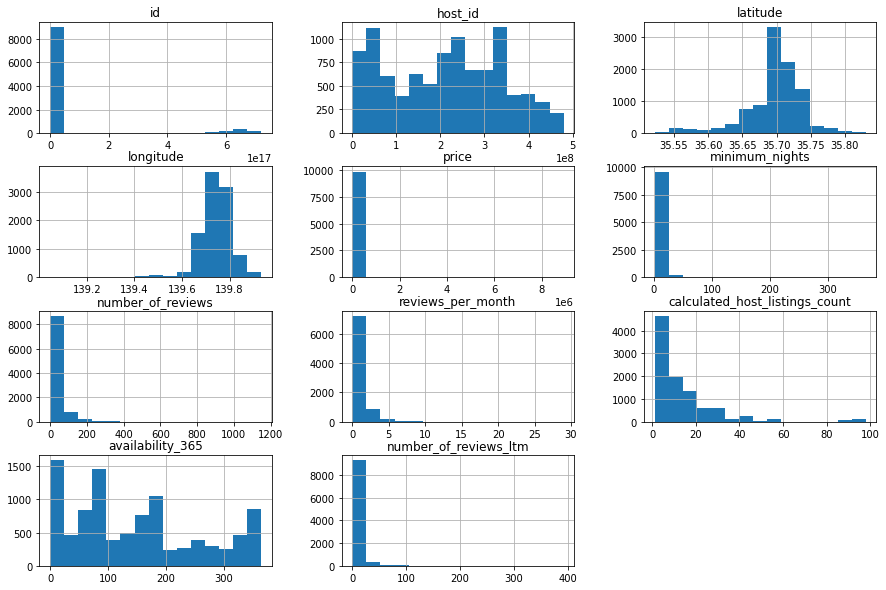

In [87]:
from pandas.plotting import hist_series
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Visualmente pelos histogramas, podemos perceber que existem *outliers* presentes nas colunas: 
 `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month` e `number_of_reviews_ltm`.

Dessa forma, vamos utilizar o método `describe` para analisar mais profundamente cada variável.

In [88]:
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
count,9.823000e+03,9823.000000,9823.000000,8296.000000,9823.000000
mean,1.498582e+04,2.540466,30.385320,1.025065,6.621399
std,9.755941e+04,8.975734,49.984574,1.318514,14.648161
min,0.000000e+00,1.000000,0.000000,0.010000,0.000000
25%,5.200000e+03,1.000000,2.000000,0.300000,0.000000
50%,8.000000e+03,1.000000,11.000000,0.690000,2.000000
75%,1.330100e+04,2.000000,38.000000,1.290000,7.000000
max,8.928571e+06,365.000000,1150.000000,28.990000,392.000000


Verificando qual seria a mediana de cada variável: 

In [89]:
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].median()

price                    8000.00
minimum_nights              1.00
number_of_reviews          11.00
reviews_per_month           0.69
number_of_reviews_ltm       2.00
dtype: float64

Analisando o `describe` e a `median` versus o histograma, existem *outliers* presentes em todas as variáveis acima analisadas. Os *outliers* têm como justificativas:

* `price`: o `max` (¥8.928,571,00/R$353.255,99 **por noite**) refere-se à propriedades que são extremamente luxuosas, podendo ser aluguel de mansões ou locais similares. Já o `min` (¥0) é considerado erro de lançamento, já que não é coerente dentro da plataforma termos acomodações gratuitas. 
* `minimum_nights`: o `max` dessa variável é de 365. São aquelas propriedades que são utilizadas como aluguel anual dentro da plataforma.

* `number_of_reviews`: o `max` refere-se à um [apartamento](https://www.airbnb.com.sg/rooms/27750681?source_impression_id=p3_1673114175_3gL%2F%2FdWQLbWzw2mm) que tem um número expressivo de reviews. Um apartamento que está cadastrado a bastante tempo na plataforma e que já foi alugado diversas vezes.
* `reviews_per_month`: por mais que tenha *outliers* pouco expressivos, a variável é inversamente proporcional à `availability_365`. É natural que quanto menos disponibilidade de uma propriedade, maior a quantidade de avaliações. Assim, o inverso também é válido.
* `number_of_reviews_ltm`: sua análise se faz de maneira análoga ao `reviews_per_month` entendendo a relação desta variável com a `availability_365`. Porém, devemos nos preocupar com a quantidade de reviews duplicados ou a taxa de resposta do host (caso a resposta também conte como review dentro dos dados). Se a resposta do host for considerado um review, o valor estaria duplicado para cada resposta de um review. Como os dados fornecidos pelo Airbnb não diferencia se o review é do host ou do guest, fica inviável de analisarmos profundamente essa variável.

### **Q4. Qual a média dos preços de aluguel?**


In [90]:
# ver a média da coluna `price``
media = df[['price']].mean()

Por mais que existam acomodações com valores altíssimos (como no caso que vimos acima), a média se apresenta com ¥14.985,00 ou R$593,00.
A mediana é de ¥8.000. 
A média foi claramente puxada para cima por causa do outlier de máximo. Já analisando pela mediana, o valor fica quase metade da média, nos trazendo uma informação viável a ser analisada.

Com a presença desses outliers, ficamos com uma visualização poluída sobre nossos dados. Vamos analisar os *boxplots* dessas variáveis:

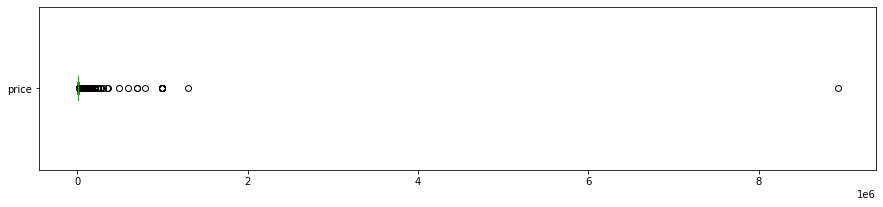

In [91]:
# boxplot do price
df.price.plot(kind='box', vert=False,figsize=(15,3));

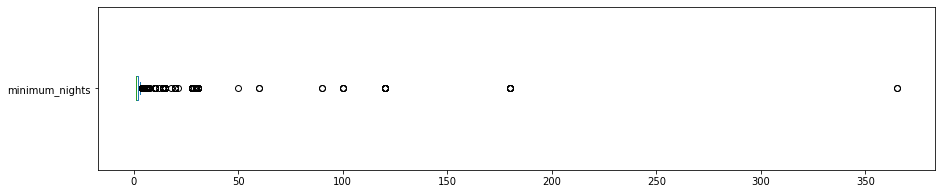

In [92]:
# boxplot do minimum_nights
df.minimum_nights.plot(kind='box', vert=False,figsize=(15,3));

In [93]:
# vendo a porcentagem de quantas acomodações existem acima de 50 minimum nights
len(df[df.minimum_nights > 50])/df.shape[0]*100


0.24432454443652651

In [94]:
# vendo a porcentagem de quantas acomodações cobram mais que 500.000 ienes
len(df[df.price > 90_000])/df.shape[0]*100

1.7509925684617733

Após analisados os boxplots dessas variáveis, vamos iniciar a limpeza.

Apenas de maneira empírica, o outlier do `price` é o max dele mesmo. Então, vamos filtrar para o mais próximo da realidade, que é aproximadamente 90.000 ienes (ou aproximadamente R$3560,00). Um valor que um grupo de pessoas de classe alta conseguiria dividir entre si.
Além disso, vamos excluir os valores iguais a zero. 

Para o `minimum_nights`, temos que existem apenas 24 acomodações com mais de 50 noites, perfazendo um total ínfimo de 0.2% frente o total.

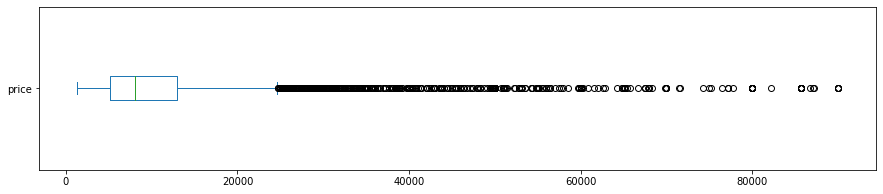

In [95]:
# copiando a função
df_clean = df.copy()
# fazendo a limpeza
df_clean.drop(df_clean[df_clean.minimum_nights >= 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 90_000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
# plot do preço
df_clean.price.plot(kind='box', vert=False,figsize=(15,3));

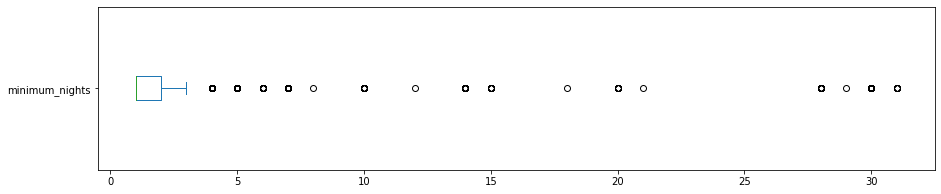

In [96]:
# plot do minimum nights
df_clean.minimum_nights.plot(kind='box', vert=False,figsize=(15,3));

### **Q4. Qual a correlação existente entre as variáveis**

Verificando as [correlações](https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/#:~:text=Se%20o%20coeficiente%20%C3%A9%20igual,as%20vari%C3%A1veis%20est%C3%A3o%20diretamente%20correlacionadas.) entre as variáveis,  temos que:

In [101]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
price,1.000000,-0.027137,0.008319,0.024769,0.004693
minimum_nights,-0.027137,1.000000,-0.056899,-0.098842,-0.083553
number_of_reviews,0.008319,-0.056899,1.000000,0.689227,0.542041
reviews_per_month,0.024769,-0.098842,0.689227,1.000000,0.835337
number_of_reviews_ltm,0.004693,-0.083553,0.542041,0.835337,1.000000


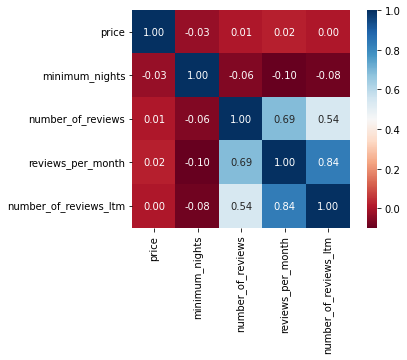

In [105]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f', square=True, linecolor='white', annot=True);

Vemos que as maiores correlações entre as variáveis são:
* `number_of_reviews` x `reviews_per_month`: é notável que quanto maior a quantidade de reviews, maior vai ser a quantidade de reviews por mês.

Essa análise também é conferida ao `reviews_per_month` x `number_of_reviews_ltm`.

Agora, usando o `price` como base:
* `minimum_nights` - quanto maior é o preço, ligeiramente menor é a quantidade de noites mínimas. Claramente que ao aumentar a quantidade de noites em uma acomodação cara, menor seria a demanda de locação.
* `number_of_reviews` - quanto maior o preço, ligeiramente maior será o número de review. Historicamente, as acomodações mais caras oferecem maior conforto, arredores e facilidades. Logo, maior chance do guest recomendar aos outros usuários via review.
* `reviews_per_month` - de maneira análoga à analise acima, infere-se o mesmo resultado.
*	`number_of_reviews_ltm` - faltam dados para analisar essa variável. Pode-se inferir que as acomodações mais caras são mais novas, o que faltaria dados para os "últimos doze meses".


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Vamos analisar agora qual é o tipo de imóvel mais alugado no Airbnb. 

In [129]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6661
Private room       2401
Hotel room          306
Shared room         240
Name: room_type, dtype: int64

In [132]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts()/df_clean.room_type.value_counts().sum()*100

Entire home/apt    69.327644
Private room       24.989592
Hotel room          3.184846
Shared room         2.497918
Name: room_type, dtype: float64

Casas ou apartamentos inteiros são 69,32% dos aluguéis realizados.

### **Q6. Qual a localidade mais cara do dataset?**



Primeiro vamos ver a quantidade de airbnb's por bairro, excluindo assim, falsas inferições. Note que o último resultado tem o valor igual à 1.

In [150]:
# verificando quantos airbnbs existem em cada bairro
qtde_bairros = df_clean.neighbourhood.value_counts()
qtde_bairros

Shinjuku Ku            1902
Taito Ku               1411
Sumida Ku              1005
Toshima Ku              730
Shibuya Ku              556
Minato Ku               372
Ota Ku                  344
Chuo Ku                 315
Setagaya Ku             296
Nakano Ku               260
Katsushika Ku           257
Edogawa Ku              248
Kita Ku                 243
Suginami Ku             204
Chiyoda Ku              203
Arakawa Ku              182
Koto Ku                 173
Shinagawa Ku            168
Bunkyo Ku               151
Itabashi Ku             145
Adachi Ku               105
Meguro Ku                49
Nerima Ku                48
Fuchu Shi                33
Hachioji Shi             22
Machida Shi              20
Hino Shi                 19
Higashimurayama Shi      17
Kokubunji Shi            11
Chofu Shi                11
Akiruno Shi              10
Mitaka Shi                9
Inagi Shi                 9
Kunitachi Shi             9
Tama Shi                  8
Komae Shi           

Agora vamos ver a média do preço dos bairros. Perceba que o primeiro bairro é o mesmo que citamos acima.

In [160]:
# ver preços por bairros, na média
bairros = df_clean.groupby(df_clean['neighbourhood']).mean()
bairros_final = bairros['price'].sort_values(ascending=False)
bairros_final

neighbourhood
Hinohara Mura          30686.000000
Kodaira Shi            20581.000000
Mitaka Shi             16424.111111
Chiyoda Ku             15502.679803
Chuo Ku                15387.895238
Okutama Machi          15219.000000
Minato Ku              14701.513441
Komae Shi              14035.750000
Shibuya Ku             13516.122302
Shinagawa Ku           13152.285714
Musashino Shi          12728.600000
Meguro Ku              12393.000000
Shinjuku Ku            11578.072555
Higashimurayama Shi    11255.176471
Nishitokyo Shi         11110.250000
Koganei Shi            10918.500000
Setagaya Ku            10900.341216
Taito Ku               10896.628632
Nakano Ku              10757.119231
Suginami Ku            10491.612745
Arakawa Ku             10388.978022
Toshima Ku             10306.558904
Hachioji Shi           10182.909091
Bunkyo Ku              10087.516556
Kita Ku                 9926.880658
Sumida Ku               9920.925373
Katsushika Ku           9895.105058
Chofu Shi     

Se tivermos verificado apenas o dado da média de preço, poderiamos inferir que o bairro Hinohara Mura seria o mais caro. Entretanto, também vimos que esse bairro tem apenas uma acomodação. 

In [171]:
final2 = pd.concat([bairros_final,qtde_bairros], axis=1)
final_apres = final2.rename(columns={'neighbourhood':'qty_on_neigh'})
final_apres = final_apres.rename(columns={'price':'mean'})
final_apres[:10]


,mean,qty_on_neigh
Hinohara Mura,30686.000000,1
Kodaira Shi,20581.000000,3
Mitaka Shi,16424.111111,9
Chiyoda Ku,15502.679803,203
Chuo Ku,15387.895238,315
Okutama Machi,15219.000000,3
Minato Ku,14701.513441,372
Komae Shi,14035.750000,8
Shibuya Ku,13516.122302,556
Shinagawa Ku,13152.285714,168


Pela tabela apresentada acima, podemos perceber que os bairros mais caros são os que tem a maior média (`mean`) e maior quantidade de airbnbs no bairro (`qty_on_neigh`). Logo, são os bairros:
* Chiyoda Ku 
* Chuo Ku
* Minato Ku

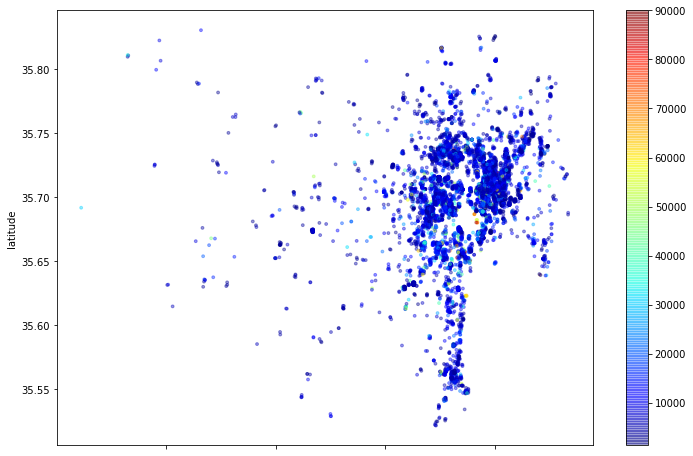

In [175]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [176]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.200978351373855

## Conclusões


Após analisar os dados do Portal Inside, podemos chegar a algumas conclusões interessantes para os proprietários de Airbnb ou que pretendem colocar sua propriedade para alugar.

* **Foque bastante nos reviews de seus guests.** Peçam para eles escreverem e responda-os. Isso fará com que o número de reviews aumente cada vez mais e valorizar a sua acomodação dentro da plataforma.
* **Se a sua diária for cara, pense nas quantidades de noites mínimas que você irá colocar.** Conforme analisamos acima, quanto mais caro você for alugar sua acomodação, menos noites deverão ser consideradas como mínimas. 
Vale ressaltar que a média de noites mínimas no Japão é de ** 2.2 noites**. Ou seja: quanto mais caro, mais próximo de 2 deverá ser essa variável.
* **Foque nos bairros mais caros de Tóquio!** Os bairros de *Chiyoda Ku*, *Chuo Ku* ou *Minato Ku* são os mais valorizados da capital nipônica. Caso tenha acomodações nesses locais, pense em um valor um pouco mais alto. Valerá a pena!
* **Privacidade é bem valiosa.** Cerca de 69% das acomodações alugadas são casas ou apartamentos inteiros. Então colocar esse tipo de propriedade para alugar terá mais demanda. 